<a href="https://colab.research.google.com/github/gustavogrds/TIC_01_2023/blob/main/ACD_T11_Kmedias_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab Solução </font></h1>
<hr>

# **Kmédias**




# Caso: **Segmentando Clientes de um Mall** 

Aqui você encontrará dados de 200 clientes de uma loja de Shopping com dados de idade, renda, sexo e score de gastos na loja. Você seguimentará esses clientes tentando obter e caracterizar grupos distintos de clientes para poder tomar decisões sobre como atuar sobre esses grupos (campanhas, ofertas de produtos etc.).

Os dados estão na URL: 'http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv'




# Exercício. Imports

Acrescente ao import básico das bibliotecas o import do `Kmeans` e do `StandardScaler` que será empregado para normalizar os valores. 

In [ ]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

# acrescente seus imports aqui
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Exercício. Acesse e explore os dados







In [ ]:
# Seu código

df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exercício. Definindo a entrada `X`

1. As entradas `X` do `kmeans` precisam ser numéricas pois ele emprega a média das distâncias dos elementos. Converta o atributo `Gender` numérico, com 'Male' = 1 e 'Female' = 0.

2. Além disso note que existe um atributo nos dados que não faz sentido ser incluído no modelo. Exclua esse atributo da entrada `X` para o treinamento.

In [ ]:
# Seu código

df.Gender = df.Gender.replace('Male',1)
df.Gender = df.Gender.replace('Female',0)
df.Gender.value_counts()

X = df.drop(columns=['CustomerID'])


## Exercício. Normalize os dados `Scaling`

O `kmeans` emprega distâncias e, portanto, é sensível à escala dos dados. Normalize os dados de `X` com o método `StandardScaler()` ou a função `scale( )` (solução mais simples)\*. 

\* nota: o método precisa ser empregado sempre que quisermos 'persistir' ou empregar novamente a normalização aplicada para novos dados preservando essa transformação. Neste caso específico, não teremos necessidade de preservar essa transformação e podemos então apenas aplicar a função `scale()` que se mostra bastante mais simples.

In [ ]:
from sklearn.preprocessing import scale
X = scale(X)

Ótimo, seus dados agora devem aparecer todos com média 0 e desvio padrão 1.

In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.554312e-17,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-8.864053e-01,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-8.864053e-01,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,1.128152e+00,7.284319e-01,6.656748e-01,8.851316e-01
max,1.128152e+00,2.235532e+00,2.917671e+00,1.894492e+00


## Exercício. Determine o número *ideal* de Clusters

O método da inércia ou regra do cotovelo, permite determinar o melhor número de cluster. Determine o número de cluster executando o código apresentado na teoria. Ele não precisa ser modificado se os dados de entradas estão corretamente em `X`. 

\*nota: existem outras métricas e critérios para decidir o número de Clusters. Algumas dependem do problema em questão (veja o problema de separar os grupos por idade para dois monitores em uma visita). Você ainda pode verificar o tamanho dos grupos evitando grupos muito grandes ou muito pequenos. E ainda existem métricas estatísticas como o `Silhouette`. Para os nossos propósitos, entretanto, será suficiente empregarmos a regra do cotovelo com base na inércia dos grupos.

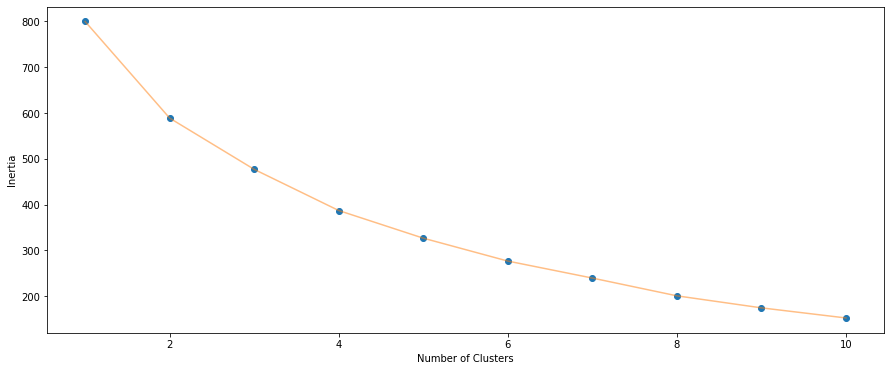

In [ ]:
inertia = []
for n in range(1 , 11):
    clf = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 1984) )
    clf.fit(X)
    inertia.append(clf.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()  


## Exercício. Segmentando os Grupos

Determinado o número (na dúvida o melhor número é o 3) vamos segmentar nossos clientes em 3 grupos. Não deixe de empregar o `random_state= 123` na função `KMeans` para obter as mesmas respostas.

In [ ]:
clf = KMeans(n_clusters = 3, random_state= 123) 
clf.fit(X)
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1
 0 1 0 1 0 2 0 1 0 1 1 1 1 1 0 1 2 1 2 1 2 1 2 2 0 1 1 2 0 1 1 0 1 2 1 1 1
 2 0 1 2 0 1 2 2 2 1 0 2 1 0 1 1 1 0 2 1 1 0 1 1 2 0 1 1 2 0 2 1 1 2 2 2 2
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0
 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 1
 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0]
[[ 0.09569148 -0.76790358  0.05687245  0.9389965 ]
 [-0.88640526  0.35241488 -0.10846569 -0.50971069]
 [ 1.12815215  0.74307816  0.06431159 -0.79449512]]


## Exercício. Identifique o grupo de alguns clientes

Adicione um atributo `cluster` ao dataframe atribuindo os grupos `labels` obtidos acima para facilitar a identificação do grupo de cada cliente.

In [ ]:
# seu código aqui

df['cluster'] = labels

A que grupos pertencem os clientes de ID 12, 34, 99?

In [ ]:
# seu código aqui

df[df.CustomerID.isin([12,34,99])]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
11,12,0,35,19,99,0
33,34,1,18,33,92,0
98,99,1,48,61,42,2


## Exercício. Caracterizando os grupos

Mas afinal, o que são esses grupos de clientes 0, 1, 2? O que pode estar diferenciando cada grupo?

Uma abordagem é olhar as médias dos valores desses grupos e observar no que um cliente médio de cada grupo se diferencia dos demais.

Empregue o modelo da teoria para exibir as médias dos valores de cada grupo e tente identificar que grupos de clientes estão sendo formados.

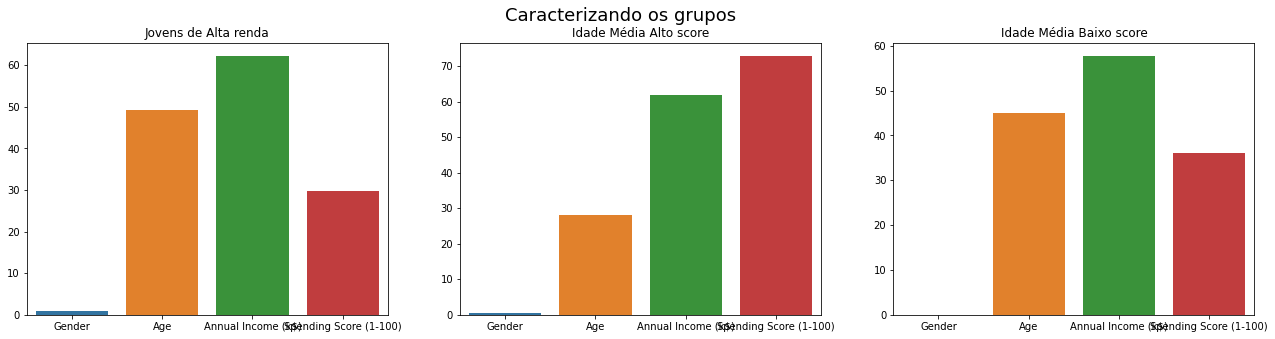

In [ ]:
g = pd.DataFrame( df.drop(columns='CustomerID').groupby('cluster').mean() ).reset_index()

f, axis = plt.subplots(1,3, figsize=(22,5))

sns.barplot(data=g[g.cluster==0].drop(columns='cluster'),ax=axis[0])
axis[0].set_title('Jovens de Alta renda')
sns.barplot(data=g[g.cluster==1].drop(columns='cluster'),ax=axis[1])
axis[1].set_title('Idade Média Alto score')
sns.barplot(data=g[g.cluster==2].drop(columns='cluster'),ax=axis[2])
axis[2].set_title('Idade Média Baixo score')
plt.suptitle('Caracterizando os grupos',fontsize=18)
plt.show()

## Exercícios. Utilizando os grupos

* Cenário **A**. A loja, em uma campanha de marketing, quer então presentear aluguns clientes com algo score com produtos para cabelos brancos. Para qual grupo/grupos ela deveria enviar os produtos? 

* Cenário **B**. Ela ainda quer fazer uma oferta de produtos de celulares modernos e de luxo. Para qual grupo/grupos ela deveria ofertar esses produtos para maximizar sua chance de vendas?


Resposta: grupo 1, Idade média alto score; grupo 0, Jovens alta renda.

# Todas respostas...

In [ ]:
print(df[df.CustomerID.isin([12,34,99])])
print(centroids)
print(labels)

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
11          12       0   35                  19                      99   
33          34       1   18                  33                      92   
98          99       1   48                  61                      42   

    cluster  
11        0  
33        0  
98        2  
[[ 0.09569148 -0.76790358  0.05687245  0.9389965 ]
 [-0.88640526  0.35241488 -0.10846569 -0.50971069]
 [ 1.12815215  0.74307816  0.06431159 -0.79449512]]
[0 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1
 0 1 0 1 0 2 0 1 0 1 1 1 1 1 0 1 2 1 2 1 2 1 2 2 0 1 1 2 0 1 1 0 1 2 1 1 1
 2 0 1 2 0 1 2 2 2 1 0 2 1 0 1 1 1 0 2 1 1 0 1 1 2 0 1 1 2 0 2 1 1 2 2 2 2
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0
 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 1
 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0]
